In [1]:
from sklearn.datasets import make_circles
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
X,Y = make_circles(n_samples=500,noise=0.02)

In [3]:
print(X.shape,Y.shape)

(500, 2) (500,)


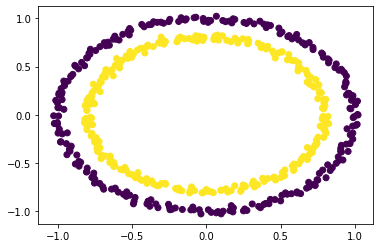

In [4]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

In [25]:
def phi(X):
    """"Non Linear Transformation"""
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X1**2+X2**2
    
    X_ = np.zeros((X.shape[0],3))
    print(X_.shape)
    
    X_[:,:-1] = X
    X_[:,-1] = X3

    return X_

In [26]:
X_ = phi(X)

(500, 3)


In [27]:
X_.shape

(500, 3)

In [28]:
print(X_[:3,:])

[[-0.68175364  0.39048714  0.61726822]
 [-0.52783225  0.86602335  1.02860332]
 [ 0.57268575 -0.81875769  0.99833313]]


In [29]:
def plot3d(X,show=True):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111,projection='3d')
    X1 = X[:,0]
    X2 = X[:,1]
    X3 = X[:,2]
    
    ax.scatter(X1,X2,X3,zdir='z',s=20,c=Y,depthshade=True)
    
    if(show==True):
        plt.show()
    return ax 

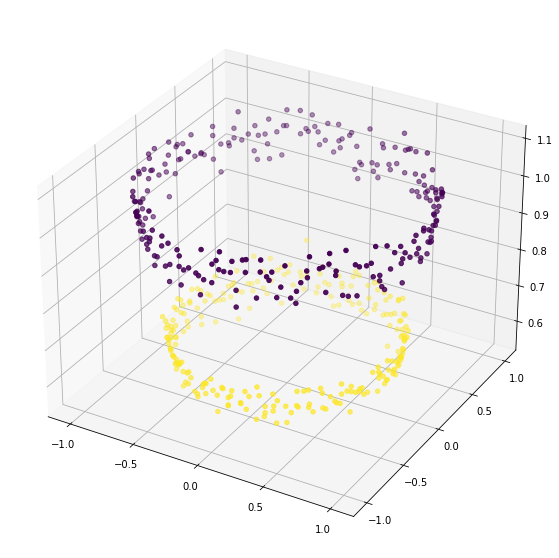

In [30]:
ax = plot3d(X_)


# Logistic Classifier

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [32]:
lr = LogisticRegression()

In [33]:
acc = cross_val_score(lr,X,Y,cv=5).mean()
print("Accuracy X(2D) is %.4f"%(acc*100))

Accuracy X(2D) is 44.4000


# Logistic Classifier on Higher Dimension Space

In [34]:
acc = cross_val_score(lr,X_,Y,cv=5).mean()
print("Accuracy X(3D) is %.4f"%(acc*100))

Accuracy X(3D) is 100.0000


# Visualise the Decision Surface

In [35]:
lr.fit(X_,Y)

LogisticRegression()

In [36]:
wts = lr.coef_
print(wts)

[[ -0.01991826   0.04846754 -10.86934124]]


In [37]:
bias = lr.intercept_

In [38]:
bias

array([8.89668695])

In [39]:
xx,yy = np.meshgrid(range(-2,2),range(-2,2))
print(xx)
print(yy)

[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]


In [40]:
z = -(wts[0,0]*xx + wts[0,1]*yy+bias)/wts[0,2]
print(z)

[[0.81325889 0.81142637 0.80959385 0.80776134]
 [0.817718   0.81588548 0.81405296 0.81222044]
 [0.8221771  0.82034458 0.81851207 0.81667955]
 [0.82663621 0.82480369 0.82297117 0.82113865]]


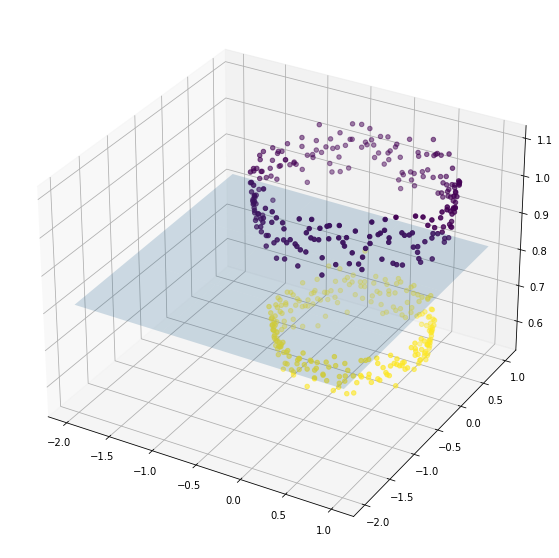

In [41]:
ax = plot3d(X_,False)
ax.plot_surface(xx,yy,z,alpha=0.2)
plt.show()

Kernel Based Classifcation in SVM's
Sklearn supports the following types of Kernels, which can be used in many-real life problems.

Linear Kernel
RBF Kernel
Polynomial Kernel
Sigmoid Kernel
Kernel trick is method of using a linear classifer to solve a non-linear problem. It transforms the linearly in-separable data into linearly separable one.

In [42]:
from sklearn import svm

# Linear Kernel SVM

In [44]:
svc = svm.SVC(kernel="linear")
svc.fit(X,Y)


SVC(kernel='linear')

In [45]:
svc.score(X,Y)

0.504

# RBF Kernel SVM# 

In [46]:
svc = svm.SVC(kernel="rbf")
svc.fit(X,Y)
svc.score(X,Y)

1.0

# Polynomial

In [47]:
svc = svm.SVC(kernel="poly")
svc.fit(X,Y)
svc.score(X,Y)


0.532

# Custom Kernel

In [48]:
def custom_kernel(x1,x2):
    return np.square(np.dot(x1,x2.T))

svc = svm.SVC(kernel=custom_kernel)
svc.fit(X,Y)
svc.score(X,Y)

1.0